In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten, AlphaDropout, SpatialDropout2D, Cropping2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

Using TensorFlow backend.


In [2]:
# preprocessing
np.set_printoptions(threshold=20000)

# load data
image_data='train_images.npy'
label_data='train_labels.csv'

# images = np.load(image_data, encoding='latin1')
images = np.load(image_data, encoding='latin1')[:,1]
labels = np.loadtxt(label_data, dtype=str, encoding='latin1', delimiter=',')[1:,1]

In [3]:
# a=[]
# for i in range(len(images)):
#     image1 = (images[i][1]).reshape(100,100)
#     #plt.imshow(image1)
#     img = cv2.imwrite('temp.jpg',image1)
#     img = cv2.imread('temp.jpg',0)
#     edges = cv2.Canny(img, 0, 100)
#     #plt.imshow(edges)

#     im2, contours, hierarchy = cv2.findContours(edges, cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
#     cnts = sorted(contours, key = cv2.contourArea, reverse = True)[:1]


#     mask=np.zeros(img.shape, np.uint8)
#     cv2.drawContours(mask, cnts, -1, (255),1)
#     a.append(mask)
#     #plt.imshow(mask)

In [4]:
# reshape X to "2d" form
# print(images[0])
# print(images.shape)
X = np.reshape(images.tolist(), (-1,100,100,1))
X = X.astype('float32')/255


# one-hot encoding for y
encoder=LabelEncoder()
encoder.fit(labels)
y_encoded = encoder.transform(labels)
y = keras.utils.to_categorical(y_encoded)

shuffle(X,y)
# X = X[:1000]
# y = y[:1000]

[array([[[[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         ...,
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]]],
 
 
        [

In [5]:
model = Sequential()

model.add(Cropping2D(2, input_shape=(100,100,1)))
# model.add(Dropout(0.5))
model.add(Conv2D(16, 7, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
# model.add(Conv2D(16, 5, padding='same', activation='relu'))
model.add(Conv2D(16, 5, padding='same', activation='relu'))
model.add(Conv2D(16, 5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
# model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
# model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(32, 2, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(32, 2, padding='same', activation='relu'))

model.add(Flatten())
# model.add(Dense(200, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(31, activation='softmax'))

epochs = 20
lrate = 0.0085
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=1e-8, nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d_1 (Cropping2D)    (None, 96, 96, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 16)        800       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 16)        6416      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 16)        6416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 16)        0         
__________

In [6]:
model.fit(X, y, validation_split=0.2, epochs=100, batch_size=48)


Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 4s 554us/step - loss: 3.3925 - acc: 0.0525 - val_loss: 3.3909 - val_acc: 0.0400
Epoch 2/100
8000/8000 [==============================] - 3s 315us/step - loss: 3.3820 - acc: 0.0545 - val_loss: 3.3857 - val_acc: 0.0535
Epoch 3/100
8000/8000 [==============================] - 3s 313us/step - loss: 3.3811 - acc: 0.0561 - val_loss: 3.3824 - val_acc: 0.0575
Epoch 4/100
8000/8000 [==============================] - 3s 315us/step - loss: 3.3805 - acc: 0.0553 - val_loss: 3.3840 - val_acc: 0.0575
Epoch 5/100
8000/8000 [==============================] - 3s 313us/step - loss: 3.3796 - acc: 0.0563 - val_loss: 3.3825 - val_acc: 0.0575
Epoch 6/100
8000/8000 [==============================] - 2s 312us/step - loss: 3.3791 - acc: 0.0569 - val_loss: 3.3844 - val_acc: 0.0575
Epoch 7/100
8000/8000 [==============================] - 3s 315us/step - loss: 3.3792 - acc: 0.0570 - val_loss: 3.3828 - val_acc: 

8000/8000 [==============================] - 3s 322us/step - loss: 1.0914 - acc: 0.6602 - val_loss: 1.4837 - val_acc: 0.5560
Epoch 61/100
8000/8000 [==============================] - 3s 313us/step - loss: 1.0805 - acc: 0.6589 - val_loss: 1.4451 - val_acc: 0.5695
Epoch 62/100
8000/8000 [==============================] - 3s 313us/step - loss: 1.0569 - acc: 0.6655 - val_loss: 1.3851 - val_acc: 0.6030
Epoch 63/100
8000/8000 [==============================] - 3s 314us/step - loss: 1.0683 - acc: 0.6610 - val_loss: 1.4218 - val_acc: 0.5905
Epoch 64/100
8000/8000 [==============================] - 3s 320us/step - loss: 1.0691 - acc: 0.6664 - val_loss: 1.4739 - val_acc: 0.5475
Epoch 65/100
8000/8000 [==============================] - 3s 315us/step - loss: 1.0386 - acc: 0.6705 - val_loss: 1.4903 - val_acc: 0.5730
Epoch 66/100
8000/8000 [==============================] - 2s 312us/step - loss: 1.0227 - acc: 0.6720 - val_loss: 1.4794 - val_acc: 0.5735
Epoch 67/100
8000/8000 [=======================

In [7]:
scores1 = model.evaluate(X, y, verbose=0)
print("Test Loss: %.2f%%" % (scores1[0]*100))
print("Test Accuracy: %.2f%%" % (scores1[1]*100))

Test Loss: 71.62%
Test Accuracy: 80.71%


In [8]:
model.save("model.h5")

TypeError: 'AxesSubplot' object does not support indexing

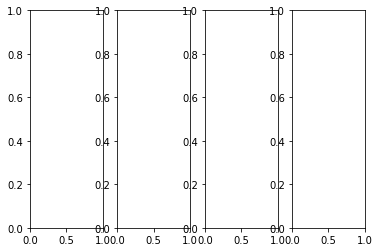

In [9]:
f, axarr = plt.subplots(1, 4)
f.subplots_adjust(hspace=0.5)

for i in range(4):
    axarr[0][i].imshow(np.reshape(X[i],(100,100)), cmap='hot', interpolation='nearest')

In [12]:
# produce prediction file
test_array = np.load('test_images.npy',encoding='latin1')[:,1]
X_test = np.reshape(test_array.tolist(), (-1,100,100,1))
X_test = X_test.astype('float32')/255
result = np.loadtxt('sample_submission.csv',dtype=str, encoding='latin1',delimiter=',')
y = model.predict(X_test)
sparse_y = [np.argmax(pred) for pred in y]
decoded_y = encoder.inverse_transform(sparse_y)
for i in range(len(decoded_y)):
    result[i+1][1]=decoded_y[i]

print(result)
    
np.savetxt('k_sgd_submission.csv', result, delimiter=',', fmt="%s")

[['Id' 'Category']
 ['0' 'pineapple']
 ['1' 'nose']
 ...
 ['9997' 'skateboard']
 ['9998' 'pineapple']
 ['9999' 'mug']]


In [ ]:
np.save("keras_1_X.npy", X)
np.save("keras_1_y.npy", y)

In [ ]:
print(encoder.classes_)

In [10]:
# produce prediction file
test_array = np.load('train_images.npy',encoding='latin1')[:,1]
X_test = np.reshape(test_array.tolist(), (-1,100,100,1))
X_test = X_test.astype('float32')/255
result = np.loadtxt('sample_submission.csv',dtype=str, encoding='latin1',delimiter=',')
y = model.predict(X_test)
# print(y)
sparse_y = [np.argmax(pred) for pred in y]
# print(sparse_y)
decoded_y = encoder.inverse_transform(sparse_y)
# print(decoded_y)
# print(result)
for i in range(len(decoded_y)):
    result[i+1][1]=decoded_y[i]

# print(result)
    
np.savetxt('train_pred.csv', result, delimiter=',', fmt="%s")